# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.



### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/aivle/6차 미니프로젝트/'

#### 3) 데이터 읽어오기

In [5]:
import os
file1 = 'data1.pkl'

In [9]:
data = joblib.load(os.path.join(path, file1))
data

,Date,Drive,Reservation,Ride,Avg_wait,Avg_tax,Avg_distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),Avg_wait_mean,Ride_ratio,Holiday,Day,Month,Season,Year,target
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,...,28.0,9.07,NaN,0.903226,New year,Thursday,January,Winter,2015,23.2
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,...,37.0,8.66,NaN,0.898987,0,Friday,January,Winter,2015,17.2
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,...,58.0,5.32,NaN,0.918689,0,Saturday,January,Winter,2015,26.2
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,...,52.0,6.48,NaN,0.927096,0,Sunday,January,Winter,2015,24.5
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,...,29.0,10.47,NaN,0.877647,0,Monday,January,Winter,2015,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,...,40.0,10.86,42.771429,0.825909,0,Tuesday,December,Fall,2022,44.4
2919,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,...,34.0,10.88,43.514286,0.822073,0,Wednesday,December,Fall,2022,44.8
2920,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,...,38.0,10.84,42.957143,0.808952,0,Thursday,December,Fall,2022,52.5
2921,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,...,66.0,0.00,41.042857,0.793501,0,Friday,December,Fall,2022,38.3


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [11]:
data['target'] = data['target'].shift(-1)
data.tail(5)

,Date,Drive,Reservation,Ride,Avg_wait,Avg_tax,Avg_distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),Avg_wait_mean,Ride_ratio,Holiday,Day,Month,Season,Year,target
2918,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,...,40.0,10.86,42.771429,0.825909,0,Tuesday,December,Fall,2022,44.8
2919,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,...,34.0,10.88,43.514286,0.822073,0,Wednesday,December,Fall,2022,52.5
2920,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,...,38.0,10.84,42.957143,0.808952,0,Thursday,December,Fall,2022,38.3
2921,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,...,66.0,0.00,41.042857,0.793501,0,Friday,December,Fall,2022,33.7
2922,2022-12-31,263,2167,1806,33.7,2318,9435,NaN,NaN,NaN,...,NaN,NaN,41.657143,0.833410,0,Saturday,December,Fall,2022,NaN


In [12]:
data.dropna(axis = 0, inplace = True)
data.isna().sum()

Date               0
Drive              0
Reservation        0
Ride               0
Avg_wait           0
Avg_tax            0
Avg_distance       0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
Avg_wait_mean      0
Ride_ratio         0
Holiday            0
Day                0
Month              0
Season             0
Year               0
target             0
dtype: int64

In [23]:
drop_cols = ['Date', 'Avg_wait']
data.drop(drop_cols, axis = 1, inplace = True)

### (2) 가변수화

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 6 to 2921
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Drive                            2916 non-null   int64  
 1   Reservation                      2916 non-null   int64  
 2   Ride                             2916 non-null   int64  
 3   Avg_tax                          2916 non-null   int64  
 4   Avg_distance                     2916 non-null   int64  
 5   temp_max                         2916 non-null   float64
 6   temp_min                         2916 non-null   float64
 7   rain(mm)                         2916 non-null   float64
 8   humidity_max(%)                  2916 non-null   float64
 9   humidity_min(%)                  2916 non-null   float64
 10  sunshine(MJ/m2)                  2916 non-null   float64
 11  Avg_wait_mean                    2916 non-null   float64
 12  Ride_ratio          

In [15]:
dumm_cols = ['Holiday', 'Day', 'Month', 'Season', 'Year']
data = pd.get_dummies(data, columns = dumm_cols, drop_first = True)
data.head()

,Date,Drive,Reservation,Ride,Avg_tax,Avg_distance,temp_max,temp_min,rain(mm),humidity_max(%),...,Season_Summer,Season_Fall,Season_Winter,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
6,2015-01-07,410,4085,3676,2230,8646,-0.2,-9.2,0.0,62.0,...,0,0,1,0,0,0,0,0,0,0
7,2015-01-08,419,4030,3728,2231,8683,3.2,-6.8,0.0,78.0,...,0,0,1,0,0,0,0,0,0,0
8,2015-01-09,424,4167,3813,2215,8506,4.3,-5.5,0.0,81.0,...,0,0,1,0,0,0,0,0,0,0
9,2015-01-10,215,1916,1645,2447,11123,2.3,-4.0,0.0,83.0,...,0,0,1,0,0,0,0,0,0,0
10,2015-01-11,187,1700,1572,2419,10806,3.4,-7.2,0.0,51.0,...,0,0,1,0,0,0,0,0,0,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [19]:
# train_set = data[:-90]
# test_set = data.tail(90)

#### 1) x, y 나누기

In [28]:
x = data.drop('target', axis = 1)
y = data.loc[:, 'target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 91, shuffle = False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [35]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### (1) 머신러닝

#### 1) 모델1

In [42]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_val)
print('MAE: ', mean_absolute_error(y_val, y_pred_lr))
print('MAPE: ', mean_absolute_percentage_error(y_val, y_pred_lr))

MAE:  4.270469319666862
MAPE:  0.10759293406979413


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


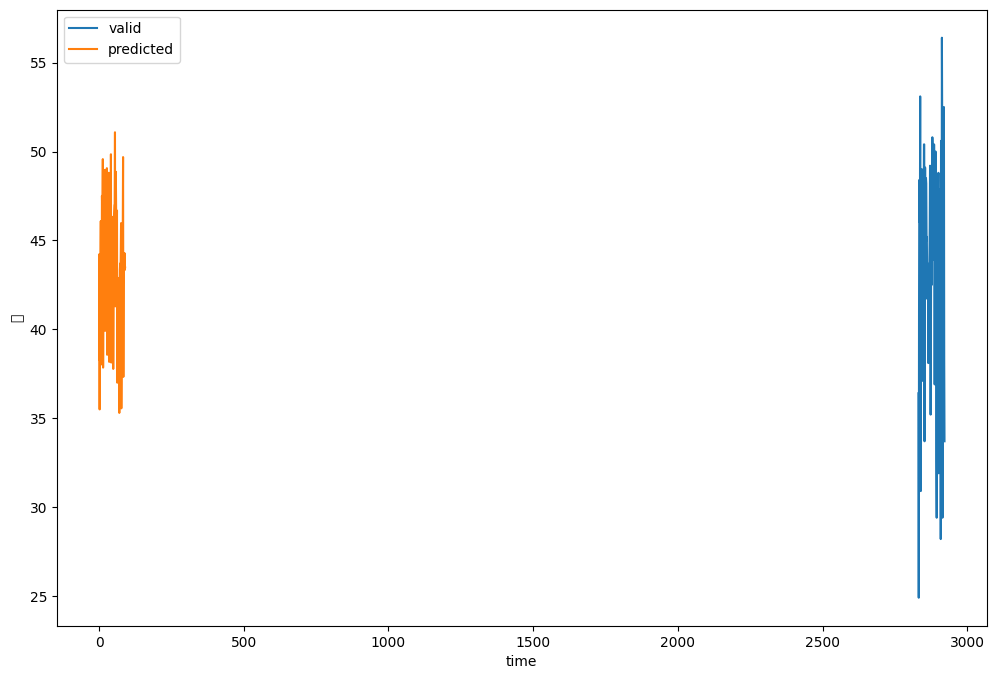

In [43]:
plt.figure(figsize = (12, 8))
plt.plot(y_val, label = 'valid')
plt.plot(y_pred_lr, label = 'predicted')
plt.xlabel('time')
plt.ylabel('값')
plt.legend()
plt.show()

#### 2) 모델2

In [46]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_val)
print('MAE: ', mean_absolute_error(y_val, y_pred_rf))
print('MAPE: ', mean_absolute_percentage_error(y_val, y_pred_rf))

MAE:  4.532384615384615
MAPE:  0.11142528028969835


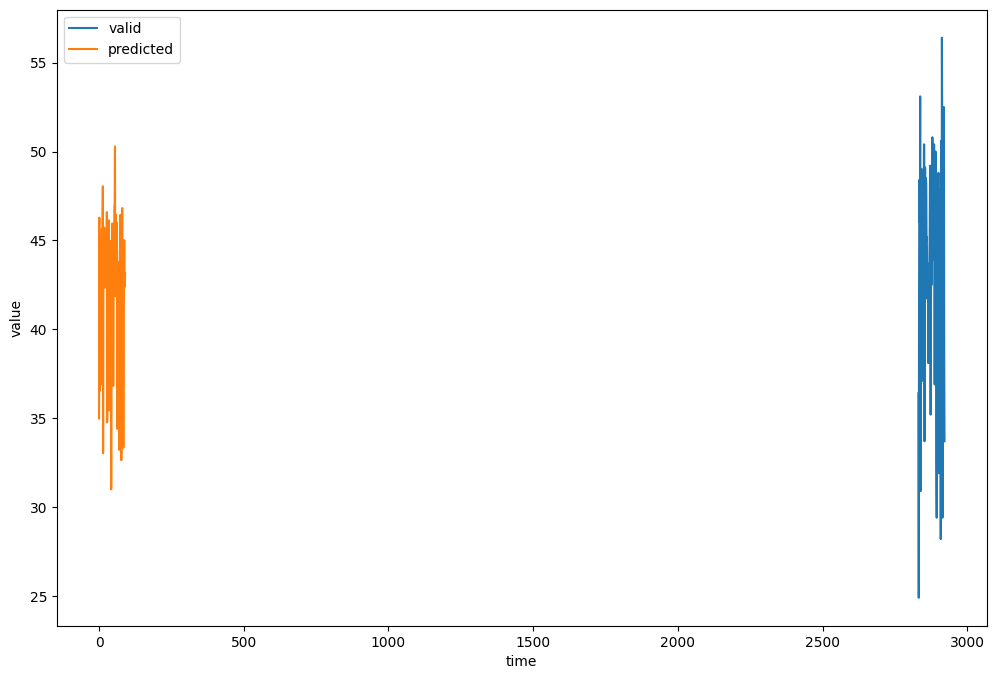

In [48]:
plt.figure(figsize = (12, 8))
plt.plot(y_val, label = 'valid')
plt.plot(y_pred_rf, label = 'predicted')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

#### 3) 모델3

In [50]:
model_lg = LGBMRegressor()
model_lg.fit(x_train, y_train)
y_pred_lg = model_lg.predict(x_val)
print('MAE: ', mean_absolute_error(y_val, y_pred_lg))
print('MAPE: ', mean_absolute_percentage_error(y_val, y_pred_lg))

MAE:  4.599998066390238
MAPE:  0.11375654396533293


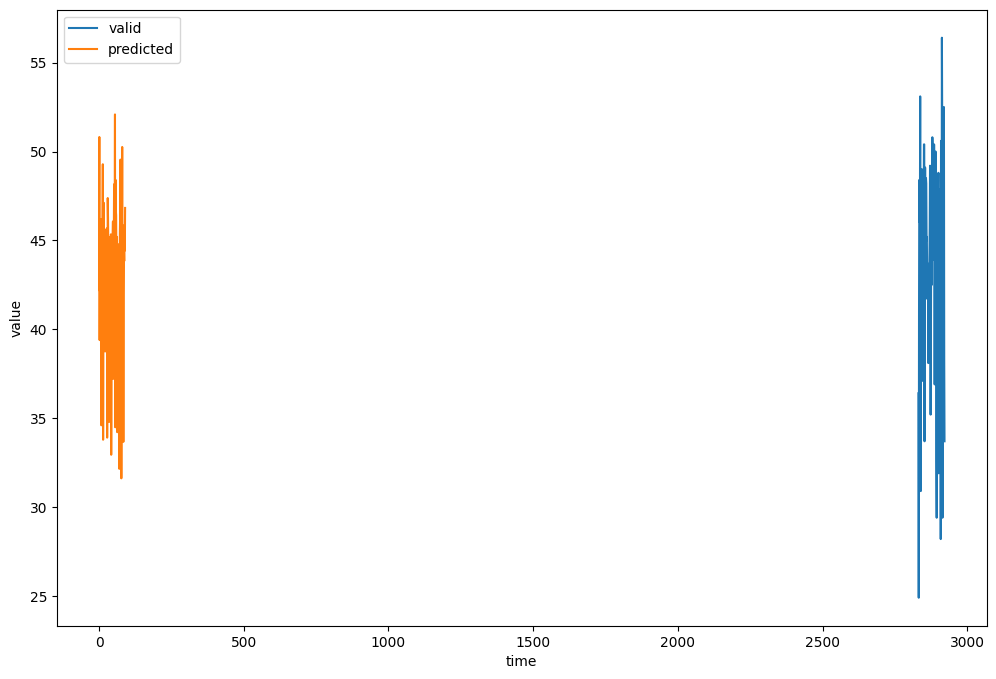

In [51]:
plt.figure(figsize = (12, 8))
plt.plot(y_val, label = 'valid')
plt.plot(y_pred_lg, label = 'predicted')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

### (2) 딥러닝

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   restore_best_weights = 5,
                   verbose =1)

mc = ModelCheckpoint('best_model.h5',
                     monitor = 'val_loss',
                     save_best_only = True)

#### 1) 모델1

In [57]:
clear_session()

model = Sequential()

model.add(Input(shape = (51, )))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = keras.losses.mean_absolute_error, optimizer = 'adam')

In [58]:
history = model.fit(x_train, y_train, epochs = 100, validation_split= 0.2, verbose = 1,
                    callbacks = [es, mc])

Epoch 1/100
71/71 [==============================] - 2s 7ms/step - loss: 37.4527 - val_loss: 17.7478
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 11.4633 - val_loss: 11.2435
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 12.1182 - val_loss: 16.2412
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 11.0939 - val_loss: 5.5797
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 9.7464 - val_loss: 8.5140
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 9.7351 - val_loss: 7.4493
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 9.6414 - val_loss: 10.3106
Epoch 8/100
71/71 [==============================] - 0s 5ms/step - loss: 10.5209 - val_loss: 5.4734
Epoch 9/100
71/71 [==============================] - 0s 5ms/step - loss: 9.6082 - val_loss: 7.4760
Epoch 10/100
71/71 [==============================] - 0s 6ms/step - loss: 9.0068 - val_loss: 7.3657


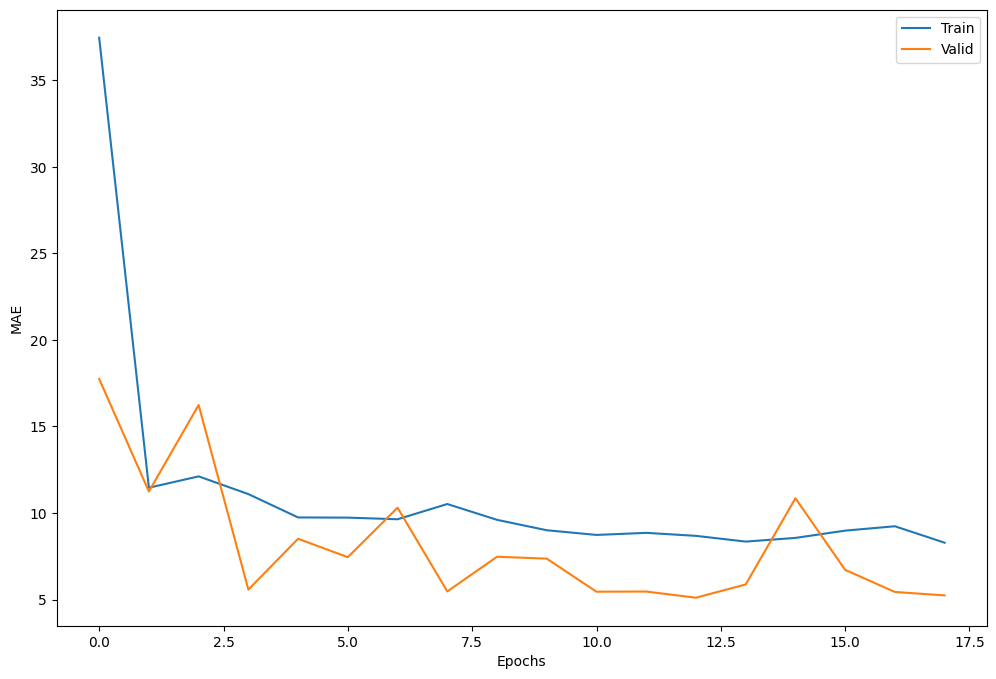

In [59]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize = (12, 8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['Train', 'Valid'])
plt.show()

In [60]:
y_pred = model.predict(x_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_val, y_pred))

3/3 [==============================] - 0s 4ms/step
MAE:  4.575199546394767
MAPE:  0.11258586871205348


#### 2) 모델2

In [61]:
clear_session()

model = Sequential()

model.add(Input(shape = (51, )))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(loss = 'MAE', optimizer = 'adam')

In [62]:
history = model.fit(x_train, y_train, validation_split= 0.2, verbose = 1, epochs = 100,
                    callbacks = [es, mc])

Epoch 1/100
71/71 [==============================] - 3s 15ms/step - loss: 41.2292 - val_loss: 24.4836
Epoch 2/100
71/71 [==============================] - 1s 11ms/step - loss: 39.2823 - val_loss: 26.0966
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 35.7808 - val_loss: 25.7191
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 30.6413 - val_loss: 60.5526
Epoch 5/100
71/71 [==============================] - 1s 8ms/step - loss: 23.8913 - val_loss: 24.1895
Epoch 6/100
71/71 [==============================] - 1s 7ms/step - loss: 16.3059 - val_loss: 25.2938
Epoch 7/100
71/71 [==============================] - 0s 7ms/step - loss: 10.7619 - val_loss: 14.7685
Epoch 8/100
71/71 [==============================] - 1s 7ms/step - loss: 8.4208 - val_loss: 14.4576
Epoch 9/100
71/71 [==============================] - 1s 7ms/step - loss: 7.7452 - val_loss: 9.2516
Epoch 10/100
71/71 [==============================] - 1s 7ms/step - loss: 7.5836 - val_los

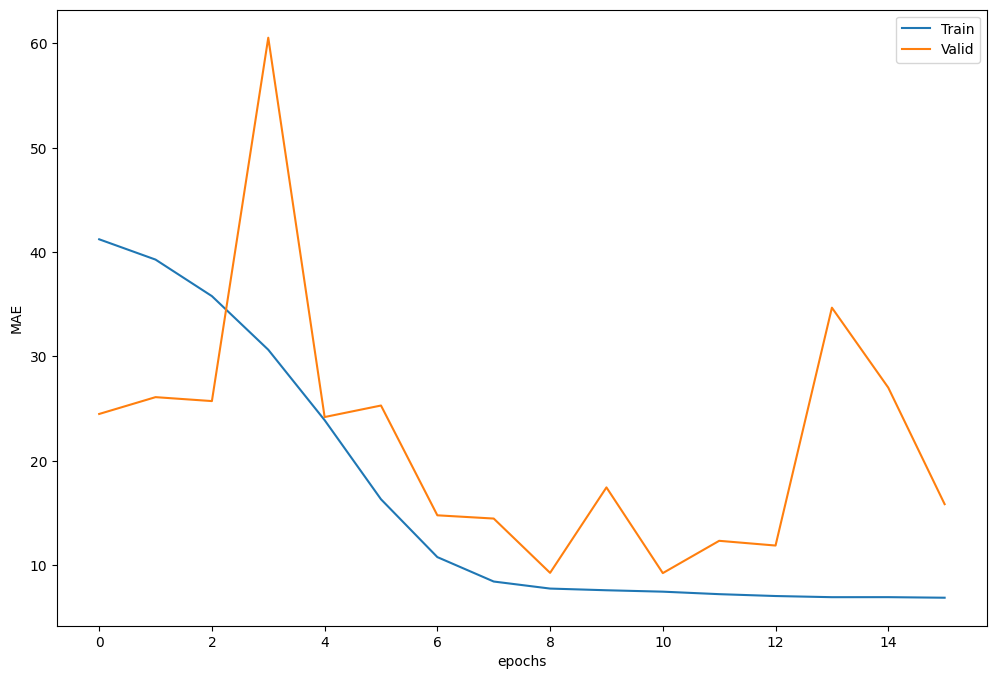

In [63]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize = (12, 8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend(['Train', 'Valid'])
plt.show()

In [64]:
y_pred = model.predict(x_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_val, y_pred))

3/3 [==============================] - 0s 5ms/step
MAE:  13.572117933336196
MAPE:  0.3006103809040654


## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

가장 성능이 좋은 모델: LinearRegression